In [60]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
from matplotlib import pyplot as plt

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [61]:
## Simple FEA program for ME335-Finite Element Analysis
## Authors: Gustavo Buscaglia and Adrian Lew
## Translated to Python by Arijit Majumdar
## Names of variables (more or less in order of appearance)
# nel:      number of elements
# nod:      number of vertices in the mesh (nodes in this case)
# X:        coordinates of vertices
# npe:      number of vertices per element
# dd:       number of spatial dimensions
# nunk:     number of unknowns/dimension of Wh ('m' in the notes)
# nbe:      number of boundary elements
# kk:       number of shape functions in an element (all elements the same)
# LG:       local-to-global map
# Etag:     constrained index set
# GG:       values of constrained components of uh
# hh:       values of natural boundary condition (one per element on the boundary, non-zero only when needed)
# ff:       values of the right hand side in an element (constant)
# diffcoef: diffusion coefficient of the equation in an element (constant)
# K:        stiffness matrix
# F:        load vector
# lge:      local-to-global map for an element
# xe:       coordinate of the vertices of an element
# fe:       value of ff in an element
# ke:       value of lambda in an element
# Ke:       element stiffness matrix
# Fe:       element load vectorcalpkg load msh

## Meshing using Gmsh

In [62]:
# Give path to save the mesh file
# meshPath = '/content/drive/MyDrive/Teaching/ME335/CP-2'
meshPath = "/content/drive/MyDrive/Colab Notebooks/ME335A"

In [63]:
!apt-get install gmsh

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gmsh is already the newest version (4.8.4+ds2-2build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [64]:
!pip install --upgrade gmsh

In [65]:
!pip install meshio

In [66]:
!pip install ipympl

In [67]:
# This will enable the rotation of the figures
# %matplotlib ipympl
import gmsh
import meshio

In [68]:
def CP2mesh(Hmax):
  # Given Hmax, construct a mesh
  # X: Coordinates - X[i,a] is the i-th coordinate of node a
  # LV: Connectivity - LV[a,e] node number of the a-th node of element e
  # BE: Boundary elements - BE[a,e], a=0,1, node numbers, BE[2,e], line
  # BN: Boundary nodes - BN[0,a], node number in column a, BN[1,a], line
  gmsh.initialize()
  gmsh.model.add('cp2Mesh')
  meshObject = gmsh.model

  # Add points
  # Points for the outer boundary
  point1 = meshObject.geo.addPoint(-1,-1,0,Hmax)
  point2 = meshObject.geo.addPoint(1,-1,0,Hmax)
  point3 = meshObject.geo.addPoint(1,1,0,Hmax)
  point4 = meshObject.geo.addPoint(-1,1,0,Hmax)

  # Points for the central hole
  point5 = meshObject.geo.addPoint(0,-0.25,0,Hmax)
  point6 = meshObject.geo.addPoint(0.25,0,0,Hmax)
  point7 = meshObject.geo.addPoint(0,0.25,0,Hmax)
  point8 = meshObject.geo.addPoint(-0.25,0,0,Hmax)

  # Points for the other holes
  point9 = meshObject.geo.addPoint(-0.5,0.4,0,Hmax)
  point10 = meshObject.geo.addPoint(-0.4,0.5,0,Hmax)
  point11 = meshObject.geo.addPoint(-0.5,0.6,0,Hmax)
  point12 = meshObject.geo.addPoint(-0.6,0.5,0,Hmax)

  point13 = meshObject.geo.addPoint(0.5,0.4,0,Hmax)
  point14 = meshObject.geo.addPoint(0.6,0.5,0,Hmax)
  point15 = meshObject.geo.addPoint(0.5,0.6,0,Hmax)
  point16 = meshObject.geo.addPoint(0.4,0.5,0,Hmax)

  point17 = meshObject.geo.addPoint(0.5,-0.6,0,Hmax)
  point18 = meshObject.geo.addPoint(0.6,-0.5,0,Hmax)
  point19 = meshObject.geo.addPoint(0.5,-0.4,0,Hmax)
  point20 = meshObject.geo.addPoint(0.4,-0.5,0,Hmax)

  point21 = meshObject.geo.addPoint(-0.5,-0.6,0,Hmax)
  point22 = meshObject.geo.addPoint(-0.4,-0.5,0,Hmax)
  point23 = meshObject.geo.addPoint(-0.5,-0.4,0,Hmax)
  point24 = meshObject.geo.addPoint(-0.6,-0.5,0,Hmax)

  # Construct lines from points
  line1 = meshObject.geo.addLine(point1, point2)
  line2 = meshObject.geo.addLine(point2, point3)
  line3 = meshObject.geo.addLine(point3, point4)
  line4 = meshObject.geo.addLine(point4, point1)

  line5 = meshObject.geo.addLine(point5, point6)
  line6 = meshObject.geo.addLine(point6, point7)
  line7 = meshObject.geo.addLine(point7, point8)
  line8 = meshObject.geo.addLine(point8, point5)

  line9 = meshObject.geo.addLine(point9, point10)
  line10 = meshObject.geo.addLine(point10, point11)
  line11 = meshObject.geo.addLine(point11, point12)
  line12 = meshObject.geo.addLine(point12, point9)

  line13 = meshObject.geo.addLine(point13, point14)
  line14 = meshObject.geo.addLine(point14, point15)
  line15 = meshObject.geo.addLine(point15, point16)
  line16 = meshObject.geo.addLine(point16, point13)

  line17 = meshObject.geo.addLine(point17, point18)
  line18 = meshObject.geo.addLine(point18, point19)
  line19 = meshObject.geo.addLine(point19, point20)
  line20 = meshObject.geo.addLine(point20, point17)

  line21 = meshObject.geo.addLine(point21, point22)
  line22 = meshObject.geo.addLine(point22, point23)
  line23 = meshObject.geo.addLine(point23, point24)
  line24 = meshObject.geo.addLine(point24, point21)

  # Construct closed curve loops
  outerBoundary = meshObject.geo.addCurveLoop([line1, line2, line3, line4])
  hole1 = meshObject.geo.addCurveLoop([line5, line6, line7, line8])
  hole2 = meshObject.geo.addCurveLoop([line9, line10, line11, line12])
  hole3 = meshObject.geo.addCurveLoop([line13, line14, line15, line16])
  hole4 = meshObject.geo.addCurveLoop([line17, line18, line19, line20])
  hole5 = meshObject.geo.addCurveLoop([line21, line22, line23, line24])

  # Define the domain as a 2D plane surface with holes
  domain2D = meshObject.geo.addPlaneSurface([outerBoundary,hole1,hole2,hole3,hole4,hole5])

  # Synchronize gmsh
  meshObject.geo.synchronize()

  # Generate the mesh
  gmsh.model.mesh.generate(2)

  gmsh.write(meshPath + 'cp2MeshFile.msh')

  gmsh.finalize()

  # Reading the Gmsh file using meshio
  reader = meshio.read(meshPath + 'cp2MeshFile.msh')

  X = reader.points
  X = X[:,:2].T

  LV = reader.cells_dict['triangle']
  LV = LV.T

  # Plot the mesh
  plt.figure(figsize=(5, 5))
  plt.triplot(X[0, :], X[1, :], LV.T, color="blue")

  # Extract edges on the boundary of the square
  # All edges in the mesh
  LE = np.vstack((np.concatenate((LV[0,:],LV[1,:],LV[2,:])), np.concatenate((LV[1,:],LV[2,:],LV[0,:]))))

  # Edges that appear only once
  sortedLE = np.sort(LE,axis=0)
  iD = np.lexsort((sortedLE[1,:],sortedLE[0,:]))
  sortedLE = sortedLE[:,iD]

  i = 0
  while i < sortedLE.shape[1]:
    if (sortedLE[0,i] == sortedLE[0,i+1]) and (sortedLE[1,i] == sortedLE[1,i+1]):
      sortedLE[:,i] = -1;
      sortedLE[:,i+1] = -1;
      i += 1

    i += 1

  # Keep only all edges on all boundaries
  LE = sortedLE[:,sortedLE[0,:] >= 0]

  # x=1  is line 0
  # y=1  is line 1
  # x=-1 is line 2
  # y=-1 is line 3
  # central square is line 4
  # small squares are line 5

  # Boundary elements on the external boundaries
  i1 = np.where((X[0,LE[0,:]]==1.0) & (X[0,LE[1,:]]==1.0))[0]
  i3 = np.where((X[0,LE[0,:]]==-1.0) & (X[0,LE[1,:]]==-1.0))[0]
  i2 = np.where((X[1,LE[0,:]]==1.0) & (X[1,LE[1,:]]==1.0))[0]
  i4 = np.where((X[1,LE[0,:]]==-1.0) & (X[1,LE[1,:]]==-1.0))[0]

  # Boundary elements on the central square
  i5 = np.where((np.abs(X[0,LE[0,:]])< 0.3) & (np.abs(X[1,LE[0,:]])<0.3))[0]

  # Remaining elements should be small squares
  allIndices = np.arange(0,LE.shape[1],1)
  allIndices[np.concatenate((i1, i2, i3, i4, i5))] = -1
  i6 = np.where(allIndices >= 0)[0]

  # Form BE matrix
  BE = np.concatenate((LE[:,i1],LE[:,i2],LE[:,i3],LE[:,i4],LE[:,i5],LE[:,i6]),axis=1)
  BElabels = np.concatenate((np.zeros(len(i1)),1*np.ones(len(i2)),2*np.ones(len(i3)),
                             3*np.ones(len(i4)),4*np.ones(len(i5)),5*np.ones(len(i6))))

  BE = np.vstack((BE,BElabels))

  # Boundary nodes per line - BN(1,:)=node numbers, BN(2,:)=line it belongs to
  BN = np.vstack((np.concatenate((BE[0,:],BE[1,:])),np.concatenate((BE[2,:],BE[2,:]))))
  BN = np.unique(BN,axis=1)

  return X, LV, BE, BN

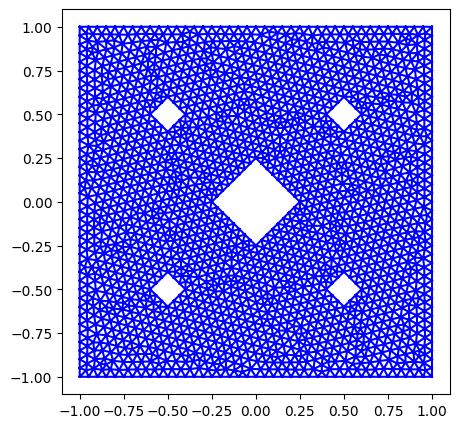

In [69]:
# Build a mesh
Hmax = 0.05
X, LV, BE, BN = CP2mesh(Hmax)
# Define local-to-global map and associated quantities
# we take LG=LV
LG=LV
nel=LG.shape[1]
npe=LG.shape[0]
nod=X.shape[1]
dd=X.shape[0]
nunk=nod
nbe=BE.shape[1]

### Finite element solver begins

Complete #1

In [70]:
#### Parameters of the problem ####
# Boundary values
# <<-------------------------------------------------------------------->>
# Complete with the value of EtaG, GG, hh, and ff, and diffcoeff

# EtaG_4 = np.unique(BE[0:2, np.where(BE[2, :] == 4)])
# EtaG_5 = np.unique(BE[0:2, np.where(BE[2, :] == 5)])

EtaG_4 = np.unique(BN[0, np.where(BN[1, :] == 4)])
EtaG_5 = np.unique(BN[0, np.where(BN[1, :] == 5)])

GG_4 = np.ones(len(EtaG_4)) * 2500.0
GG_5 = np.ones(len(EtaG_5)) * 100.0
EtaG = np.concatenate((EtaG_4, EtaG_5)).astype(int) # Constrained indices
GG = np.concatenate((GG_4, GG_5)).astype(int) # Value of u for each constrained index

# hh = np.array([0.9, 0.0, -0.1, 0.0]) # Value of Neumann boundary condition for each edge in BE
hh = np.zeros(4) # Value of Neumann boundary condition for each edge in BE
ff = np.ones(nel) * 0.2 # Value of f for each element

# Material parameters
difcoef = np.ones(nel) * 2e-4 # Value of k for each element
# <<-------------------------------------------------------------------->>

Complete #2

In [71]:
# Element matrix and load
def elementKandF(xe, ke, fe):
  # <<-------------------------------------------------------------------->>
  # Complete by computing Ke and Fe
  # <<-------------------------------------------------------------------->>
  # element stiffness matrix
  dN = np.array([[xe[1, 1] - xe[1, 2], xe[1, 2] - xe[1, 0], xe[1, 0] - xe[1, 1]],
                [xe[0, 2] - xe[0, 1], xe[0, 0] - xe[0, 2], xe[0, 1] - xe[0, 0]]])
  Ae2 = dN[1, 2] * dN[0, 1] - dN[0, 2] * dN[1, 1]
  dN = dN / Ae2
  Ke = (Ae2 / 2) * ke * (dN.T @ dN)

  # element load vector
  Fe = Ae2 * fe * np.ones((3, 1)) / 6

  return Ke, Fe

Complete #3

In [72]:
# Compute shape functions and derivatives to reconstruct function inside
def P1Functions(xe,x):
  # <<-------------------------------------------------------------------->>
  # Complete by computing the shape functions NN and their gradient dN at x
  # NN[a] contains the value of N_a^e(x), and dN is defined in the notes
  # <<-------------------------------------------------------------------->>
  # Extract node coordinates
  x1, x2, x3 = xe[0, 0], xe[0, 1], xe[0, 2]
  y1, y2, y3 = xe[1, 0], xe[1, 1], xe[1, 2]

  # Compute the area of the triangle
  area = 0.5 * abs((x2 - x1) * (y3 - y1) - (x3 - x1) * (y2 - y1))

  # Compute coefficients for shape functions
  lambda1 = (-(y3 - y2) * (x[0] - x2) + (x3 - x2) * (x[1] - y2)) / (2 * area)
  lambda2 = (-(y1 - y3) * (x[0] - x3) + (x1 - x3) * (x[1] - y3)) / (2 * area)
  lambda3 = (-(y2 - y1) * (x[0] - x1) + (x2 - x1) * (x[1] - y1)) / (2 * area)

  NN = np.array([lambda1, lambda2, lambda3])
  dN = np.array([[y2 - y3, y3 - y1, y1 - y2], [x3 - x2, x1 - x3, x2 - x1]]) / (2 * area)

  return NN, dN

Complete #4

In [73]:
def uValue(xp, X, LV, U):
  # <<-------------------------------------------------------------------->>
  # Complete by computing the value of u=[u(xp)] and du=[dudx(xp), dudy(xp)]
  # Return 0 in u and du if xp is outside the domain
  # <<-------------------------------------------------------------------->>
  # Return 0 outside the domain
  flag = False

  # Find closest nodes
  for iel in range(nel):
    lge = LV[:,iel]
    xe = X[:dd,lge[:npe]]
    NN, dN = P1Functions(xe, xp)
    if np.all((NN >= 0.0) & (NN <= 1.0)):
      flag = True
      break

  # Construct function
  if flag:
    u = NN @ U[lge]
    du = dN @ U[lge]
  else:
    u = np.zeros(1)
    du = np.zeros((2,1))

  return u, du

In [74]:
#### Assembly from local to global ####
K=np.zeros((nunk,nunk))
F=np.zeros((nunk,1))

for iel in range(nel):
  # setting the local data
  lge = LG[:,iel]
  xe=X[:dd,lge[:npe]]
  ke=difcoef[iel]
  fe=ff[iel]
  # Computing element K and F
  Ke, Fe = elementKandF(xe, ke, fe)
  for a in range(len(lge)):
    for b in range(len(lge)):
      K[lge[a],lge[b]] += Ke[a,b]

  F[lge] += Fe

In [75]:
# Nodes with specified values
ng = len(EtaG)
II = np.eye(nunk)
for ig in range(ng):
  K[EtaG[ig],:]=II[EtaG[ig],:]
  F[EtaG[ig]]=GG[ig]

Complete #5

In [76]:
# Neumann Boundaries
# <<-------------------------------------------------------------------->>
# Assemble Neumann boundary conditions
# <<-------------------------------------------------------------------->>
h01 = BE[0, np.where(BE[2, :] == 0)].astype(int).flatten()
h02 = BE[1, np.where(BE[2, :] == 0)].astype(int).flatten()
h11 = BE[0, np.where(BE[2, :] == 1)].astype(int).flatten()
h12 = BE[1, np.where(BE[2, :] == 1)].astype(int).flatten()
h21 = BE[0, np.where(BE[2, :] == 2)].astype(int).flatten()
h22 = BE[1, np.where(BE[2, :] == 2)].astype(int).flatten()
h31 = BE[0, np.where(BE[2, :] == 3)].astype(int).flatten()
h32 = BE[1, np.where(BE[2, :] == 3)].astype(int).flatten()

F[h01, 0] += np.linalg.norm(X[:, h01] - X[:, h02], axis=0) * hh[0] / 2
F[h02, 0] += np.linalg.norm(X[:, h01] - X[:, h02], axis=0) * hh[0] / 2
F[h11, 0] += np.linalg.norm(X[:, h11] - X[:, h12], axis=0) * hh[1] / 2
F[h12, 0] += np.linalg.norm(X[:, h11] - X[:, h12], axis=0) * hh[1] / 2
F[h21, 0] += np.linalg.norm(X[:, h21] - X[:, h22], axis=0) * hh[2] / 2
F[h22, 0] += np.linalg.norm(X[:, h21] - X[:, h22], axis=0) * hh[2] / 2
F[h31, 0] += np.linalg.norm(X[:, h31] - X[:, h32], axis=0) * hh[3] / 2
F[h32, 0] += np.linalg.norm(X[:, h31] - X[:, h32], axis=0) * hh[3] / 2

In [77]:
# Solve algebraic system
# U = np.matmul(np.linalg.inv(K),F)
U = np.linalg.solve(K, F)

Enable the widget to rotate the plots - Disable it later if you want

In [78]:
from google.colab import output
output.enable_custom_widget_manager()

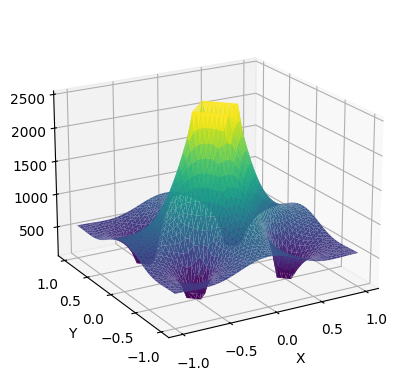

In [79]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=-120)
ax.plot_trisurf(X[0,:],X[1,:],U[:,0],triangles=LG.T,cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
# ax.set_zlabel('T')
# plt.tight_layout()
plt.show()

<ipython-input-80-f7ba95b528e3>:2: UserWarning: The following kwargs were not used by contour: 'triangles'
  contour = ax.tricontourf(X[0,:], X[1,:], U[:,0], triangles=LG.T, cmap='viridis')


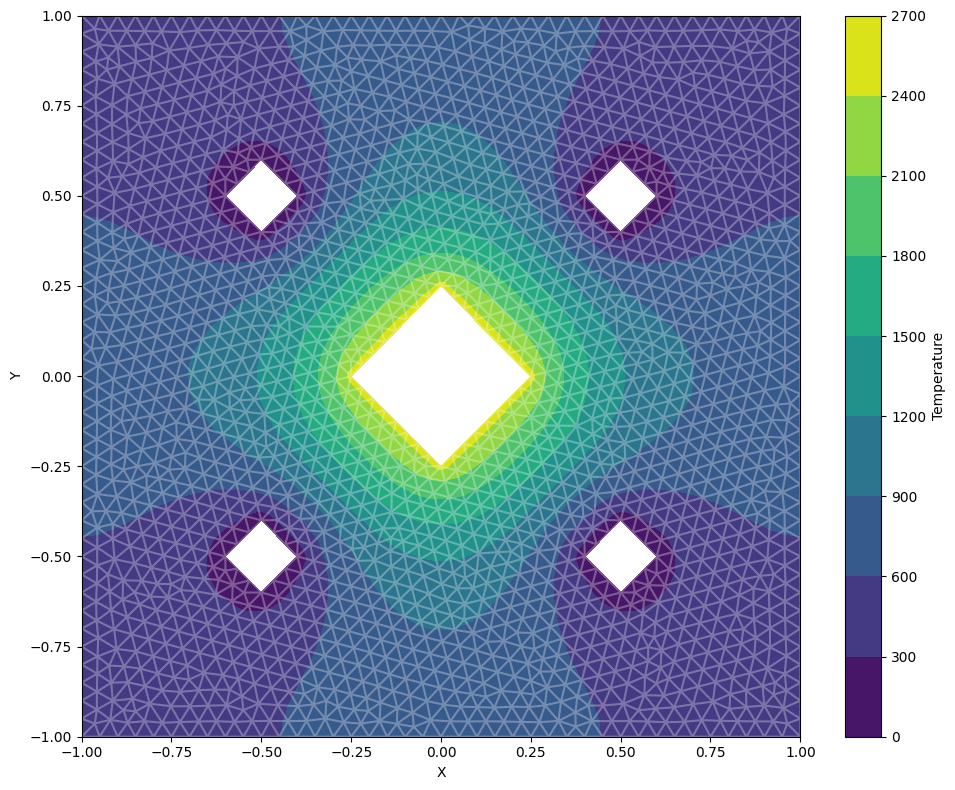

In [80]:
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.tricontourf(X[0,:], X[1,:], U[:,0], triangles=LG.T, cmap='viridis')
plt.colorbar(contour, ax=ax, label='Temperature')
ax.triplot(X[0,:], X[1,:], triangles=LG.T, color='white', alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
# ax.set_title('2D Plot of Triangular Mesh')
plt.tight_layout()
plt.show()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [81]:
from google.colab import output
output.disable_custom_widget_manager()

In [82]:
# Evaluate the solution
# Values requested
u, du = uValue(np.array([0,0.9]),X,LV,U)
print('u = {}, du = {}'.format(u,du))
u, du = uValue(np.array([0.25,0.25]),X,LV,U)
print('u = {}, du = {}'.format(u,du))
u, du = uValue(np.array([0,1.9]),X,LV,U)
print('u = {}, du = {}'.format(u,du))

u = [799.74854447], du = [[ -66.80655519]
 [-258.03782233]]
u = [1587.29644906], du = [[-3388.71814985]
 [-3420.68071849]]
u = [0.], du = [[0.]
 [0.]]


In [83]:
# Export values at a grid, to evaluate errors
n = 10
u = np.zeros((n+1,n+1))
du = np.zeros((2,n+1,n+1))
for i in range(n+1):
  for j in range(n+1):
    Xs = np.array([-1+2*i/n,-1+2*j/n])
    utmp, dutmp = uValue(Xs,X,LV,U)
    u[i,j] = utmp[0]
    du[:,i,j] = dutmp.flatten()

np.save(meshPath + f'u_grid_hmax_{Hmax}.npy', u)
np.save(meshPath + f'du_grid_hmax_{Hmax}.npy', du)

Add below code to export the values to a file, or anyway you want to process them.

In [84]:
# Define norm functions
def u_norm(u): return np.sqrt(np.sum(np.square(u)))
def du_norm(du): return np.sqrt(np.sum(np.square(du)))

In [85]:
# Recorded solutions
Hmaxs = [0.2, 0.1, 0.05, 0.025]
us = [np.load(meshPath + f'u_grid_hmax_{x}.npy') for x in Hmaxs]
dus = [np.load(meshPath + f'du_grid_hmax_{x}.npy') for x in Hmaxs]

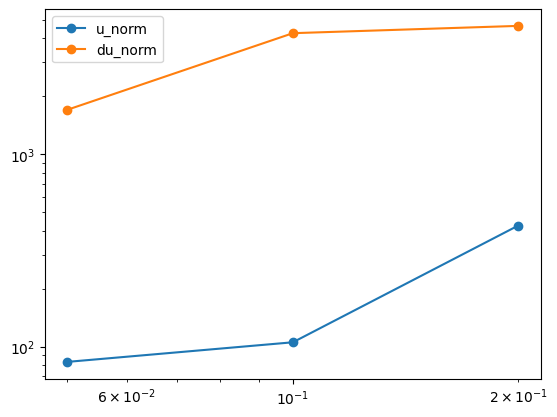

In [86]:
u_norms = [u_norm(us[i] - us[i+1]) for i in range(len(us)-1)]
du_norms = [du_norm(dus[i] - dus[i+1]) for i in range(len(dus)-1)]

plt.plot(Hmaxs[:-1], u_norms, 'o-', label='u_norm')
plt.plot(Hmaxs[:-1], du_norms, 'o-', label='du_norm')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [87]:
import numpy as np
from scipy import stats

def fit_line(x, y):
    """
    Returns r and Cu
    """
    log_x = np.log(x)
    log_y = np.log(y)

    slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, log_y)
    Cu = np.exp(intercept) / 2

    return slope, Cu

# For u_norms
x_u = Hmaxs[-3:-1]
y_u = u_norms[-2:]
r_u, Cu_u = fit_line(x_u, y_u)

print(f"u_norms:")
print(f"r: {r_u:.4f}")
print(f"Cu: {Cu_u/2:.4f}")

# For du_norms
x_du = Hmaxs[-3:-1]
y_du = du_norms[-2:]
r_du, Cu_du = fit_line(x_du, y_du)

print(f"\ndu_norms:")
print(f"r: {r_du:.4f}")
print(f"Cu: {Cu_du/2:.4f}")

# Error bound 30 degrees
mesh_size = np.exp(np.log(30 / (2 * Cu_u)) / r_u)
print(f"\nMesh Size for 30C error: {mesh_size:.4f}")

u_norms:
r: 0.3382
Cu: 57.3196

du_norms:
r: 1.3214
Cu: 22255.7936

Mesh Size for 30C error: 0.0024


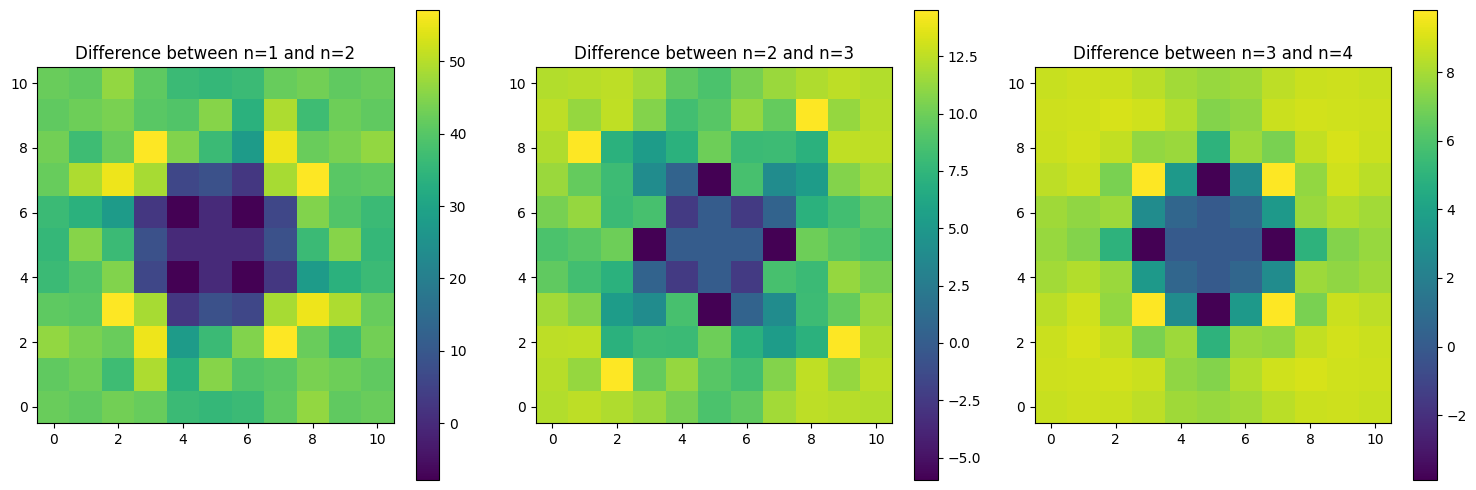

In [88]:
Hmaxs = [0.2, 0.1, 0.05, 0.025]
us = [np.load(meshPath + f'u_grid_hmax_{x}.npy') for x in Hmaxs]
dus = [np.load(meshPath + f'du_grid_hmax_{x}.npy') for x in Hmaxs]
diff_us = [us[i+1] - us[i] for i in range(3)]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    im = axs[i].imshow(diff_us[i], cmap='viridis', origin='lower')
    axs[i].set_title(f'Difference between n={i+1} and n={i+2}')
    fig.colorbar(im, ax=axs[i])
plt.tight_layout()
plt.show()